<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Import Dependencies and Create Environment</div>

We set up the environment for working with simulated environments using the 'gym' library and prepares for visualizing the environment states using 'matplotlib' and 'IPython'.

In [2]:
import numpy as np
print(f'numpy: {np.__version__}')  # Print version

# Note: Need to 'pip install gym' and 'pip install gym[toy_text]'
# or use 'pip install gym\[toy_text\]' if zsh does not recognize the other command
import gym  # For simulated environments
print(f'gym: {gym.__version__}')  # Print version

import matplotlib
import matplotlib.pyplot as plt  # For displaying environment states
print(f'matplotlib: {matplotlib.__version__}')  # Print version
from IPython import display  # For displaying environment states

numpy: 1.24.3
gym: 0.26.2
matplotlib: 3.7.2


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Initialize the Environment</div>

This code initializes a 'Taxi-v3' environment using the 'gym' library, allowing customization of parameters such as the maximum episode steps, autoreset behavior, environment checker, and rendering mode.

In [3]:
# Create a 'Taxi-v3' environment with customizable settings
env = gym.make(id='Taxi-v3',  # Choose one of the existing environments
               max_episode_steps=None,  # Maximum length of an episode (TimeLimit wrapper). Default is None.
               autoreset=False,  # Whether to automatically reset the environment after each episode (AutoResetWrapper). Default is None.
               disable_env_checker=None,  # If to run the environment checker. Default is None.
               render_mode='rgb_array'  # The set of supported modes varies per environment. Some third-party environments may not support rendering at all.
               )


1. Prints the array representation of the environment's description (map) using env.desc.
2. Retrieves and prints information about the observation (state) space of the environment, including details such as the shape and type of the observation space.
2. Retrieves and prints information about the action space of the environment, including details such as the number of possible actions and the type of action space (discrete or continuous).

In summary, the code provides a visual representation of the environment map and essential information about the observation and action spaces, helping to understand the characteristics of the environment in terms of its states and possible actions.

In [4]:
# Show environment description (map) as an array
print("Environment Array: ")
print(env.desc)

# Observation and action space 
state_obs_space = env.observation_space # Returns sate(observation) space of the environment.
action_space = env.action_space # Returns action space of the environment.
print("State(Observation) space:", state_obs_space)
print("Action space:", action_space)

Environment Array: 
[[b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']
 [b'|' b'R' b':' b' ' b'|' b' ' b':' b' ' b':' b'G' b'|']
 [b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b':' b' ' b':' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b'|']
 [b'|' b'Y' b'|' b' ' b':' b' ' b'|' b'B' b':' b' ' b'|']
 [b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']]
State(Observation) space: Discrete(500)
Action space: Discrete(6)


This code resets the environment, takes 30 random steps with rendering and displaying at each step, and resets the environment when the agent either falls into a hole or reaches the goal. Finally, it closes the environment.

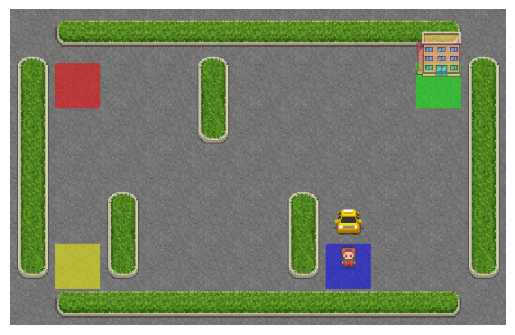

In [5]:
# Reset the environment to its initial state
state, info = env.reset()

# Cycle through 30 random steps, rendering and displaying the agent inside the environment each time
for _ in range(30):
    # Render and display the current state of the environment
    plt.imshow(env.render())  # Render the current state and pass it to pyplot
    plt.axis('off')
    display.display(plt.gcf())  # Get the current figure and display it
    display.clear_output(wait=True)  # Clear output before showing the next frame

    # Sample a random action from the entire action space
    random_action = env.action_space.sample()

    # Pass the random action into the step function
    state, reward, done, _, info = env.step(random_action)

    # Reset the environment when done=True, i.e., when the agent falls into a Hole (H) or reaches the Goal (G)
    if done:
        # Render and display the current state of the environment
        plt.imshow(env.render())  # Render the current state and pass it to pyplot
        plt.axis('off')
        display.display(plt.gcf())  # Get the current figure and display it
        display.clear_output(wait=True)  # Clear output before showing the next frame
        # Reset the environment
        state, info = env.reset()

# Close the environment
env.close()


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Sarsa Parameters</div>

SARSA Parameters:

1. alpha: Learning rate, determining the step size for updating the Q-values. It influences how much of the new information will overwrite the old information.
gamma: Discount factor, indicating the importance of future rewards. It determines the weight given to future rewards in the Q-value updates.
Training Parameters:

2. n_episodes: Number of episodes to use for training. An episode represents a single run of the agent in the environment, starting from the initial state and ending when a terminal state is reached.
n_max_steps: Maximum number of steps allowed per episode. If the agent does not reach a terminal state within this limit, the episode is terminated.
Exploration/Exploitation Parameters:

3. start_epsilon: Initial exploration rate. At the beginning of training, actions are chosen randomly with high probability.
min_epsilon: The minimum exploration rate. The epsilon value will decay gradually during training but won't go below this minimum value.
4. decay_rate: The rate at which epsilon decays during training. A smaller value leads to a slower decay, allowing for more exploration early in training.

In summary, these parameters are used to configure the SARSA algorithm for training an agent in a reinforcement learning environment. The algorithm learns a policy to balance exploration and exploitation, updating Q-values based on the observed rewards and future state-action pairs. The training process involves running episodes, adjusting the Q-values, and gradually reducing exploration over time.

In [6]:
# SARSA parameters
alpha = 0.1   # learning rate
gamma = 0.95  # discount factor

# Training parameters
n_episodes = 100000  # number of episodes to use for training
n_max_steps = 100   # maximum number of steps per episode

# Exploration / Exploitation parameters
start_epsilon = 1.0  # start training by selecting purely random actions
min_epsilon = 0.0   # the lowest epsilon allowed to decay to
decay_rate = 0.00001   # epsilon will gradually decay so we do less exploring and more exploiting as Q-function improves


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Initiate Q Table</div>

In [7]:
# Initial Q-table
# Our Q-table is a matrix of state(observation) space x action space, i.e., 500 x 6
Qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Show
Qtable

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

These functions implement an epsilon-greedy policy for action selection during training and a greedy policy for action selection during evaluation. The epsilon_greedy function randomly explores or exploits the Q-table based on the given epsilon value, the update_Q function updates the Q-table using the Q-learning update rule, and the eval_greedy function selects actions greedily during evaluation.

In [8]:
# Acting policy (epsilon-greedy) for selecting actions during training
def epsilon_greedy(Qtable, state, epsilon):
    # Generate a random number and compare it to epsilon
    rand_num = np.random.uniform(0, 1)
    if rand_num < epsilon:
        action = env.action_space.sample()  # Explore
    else:
        action = np.argmax(Qtable[state, :])  # Exploit
    return action

# Update the Q-table based on epsilon-greedy approach
def update_Q(Qtable, state, action, reward, next_state, next_action):
    # Q(S_t, A_t) = Q(S_t, A_t) + alpha * [R_t+1 + gamma * Q(S_t+1, A_t+1) - Q(S_t, A_t)]
    Qtable[state][action] = Qtable[state][action] + alpha * (reward + gamma * Qtable[next_state][next_action] - Qtable[state][action])
    return Qtable

# Greedy function for selecting actions during evaluation
def eval_greedy(Qtable, state):
    action = np.argmax(Qtable[state, :])
    return action


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Train the Agent</div>

This function performs Q-learning training for a specified number of episodes, updating the Q-table based on epsilon-greedy policy. The epsilon value decreases over episodes, controlling the balance between exploration and exploitation. The final Q-table is returned after training.

In [9]:
def train(n_episodes, n_max_steps, start_epsilon, min_epsilon, decay_rate, Qtable):
    for episode in range(n_episodes):
        # Reset the environment at the start of each episode
        state, info = env.reset()
        
        # Calculate epsilon value based on decay rate
        epsilon = max(min_epsilon, (start_epsilon - min_epsilon) * np.exp(-decay_rate * episode))
        
        # Choose an action using the previously defined epsilon-greedy policy
        action = epsilon_greedy(Qtable, state, epsilon)
        
        for t in range(n_max_steps):
            # Perform the action in the environment, get reward and next state
            next_state, reward, done, _, info = env.step(action)
            
            # Choose the next action
            next_action = epsilon_greedy(Qtable, next_state, epsilon)
            
            # Update the Q-table
            Qtable = update_Q(Qtable, state, action, reward, next_state, next_action)
            
            # Update the current state and action
            state = next_state
            action = next_action
            
            # Finish the episode when done=True, i.e., reached the goal or fallen into a hole
            if done:
                break
    
    # Return the final Q-table
    return Qtable


This code trains the Q-table using the train function with the specified parameters and then prints the final Q-table. Note that the way the Q-table is displayed may depend on its size, and this example assumes it is small enough to be printed directly. If the Q-table is large, you might want to visualize or analyze it differently.

In [10]:
# Train the Q-table using the specified parameters
Qtable = train(n_episodes, n_max_steps, start_epsilon, min_epsilon, decay_rate, Qtable)

# Display the final Q-table
print("Final Q-table:")
print(Qtable)

Final Q-table:
[[  0.           0.           0.           0.           0.
    0.        ]
 [-15.62293457 -12.65212336 -15.63595107 -13.25026095 -10.93728053
  -21.75026073]
 [ -5.85871437  -3.27712927  -6.55083685  -3.26866283  -1.11012162
  -11.53034248]
 ...
 [  0.37215689   4.15498105  -3.2031267   -3.29098788 -10.33053327
  -10.5041608 ]
 [-18.65027076 -14.36357147 -15.59163357 -10.17967891 -26.55086467
  -23.78464458]
 [ 10.76519146   6.76760875   9.51249667  13.77543647   3.2599165
    3.01861298]]


This function evaluates the agent's performance using the greedy policy over a specified number of episodes. It calculates the mean and standard deviation of the total rewards and returns these values along with the list of episode rewards.

In [12]:
def evaluate_agent(n_max_steps, n_eval_episodes, Qtable):
    # Initialize an empty list to store rewards for each episode
    episode_rewards = []
    
    # Evaluate for each episode
    for episode in range(n_eval_episodes):
        # Reset the environment at the start of each episode
        state, info = env.reset()
        tot_episode_reward = 0
        
        for t in range(n_max_steps):
            # Use greedy policy to evaluate
            action = eval_greedy(Qtable, state)

            # Pass the action into the step function
            next_state, reward, done, _, info = env.step(action)

            # Sum episode rewards
            tot_episode_reward += reward

            # Update the current state
            state = next_state
            
            # Finish the episode when done=True, i.e., reached the goal or fallen into a hole
            if done:
                break
                
        episode_rewards.append(tot_episode_reward)
        
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward, episode_rewards


1. Specifies the number of evaluation episodes (n_eval_episodes).
2. Evaluates the agent's performance over the specified number of episodes using the evaluate_agent function.
3. Prints the mean reward, standard deviation, minimum, and maximum rewards obtained during the evaluation.
4. Plots a histogram showing the distribution of episode rewards obtained from the evaluation.

In summary, the code provides a concise and clear representation of the evaluation process, its results, and a visualization of the distribution of rewards.

Mean Reward: 7.97 +/- 2.59
Min Reward: 3.0, Max Reward: 15.0


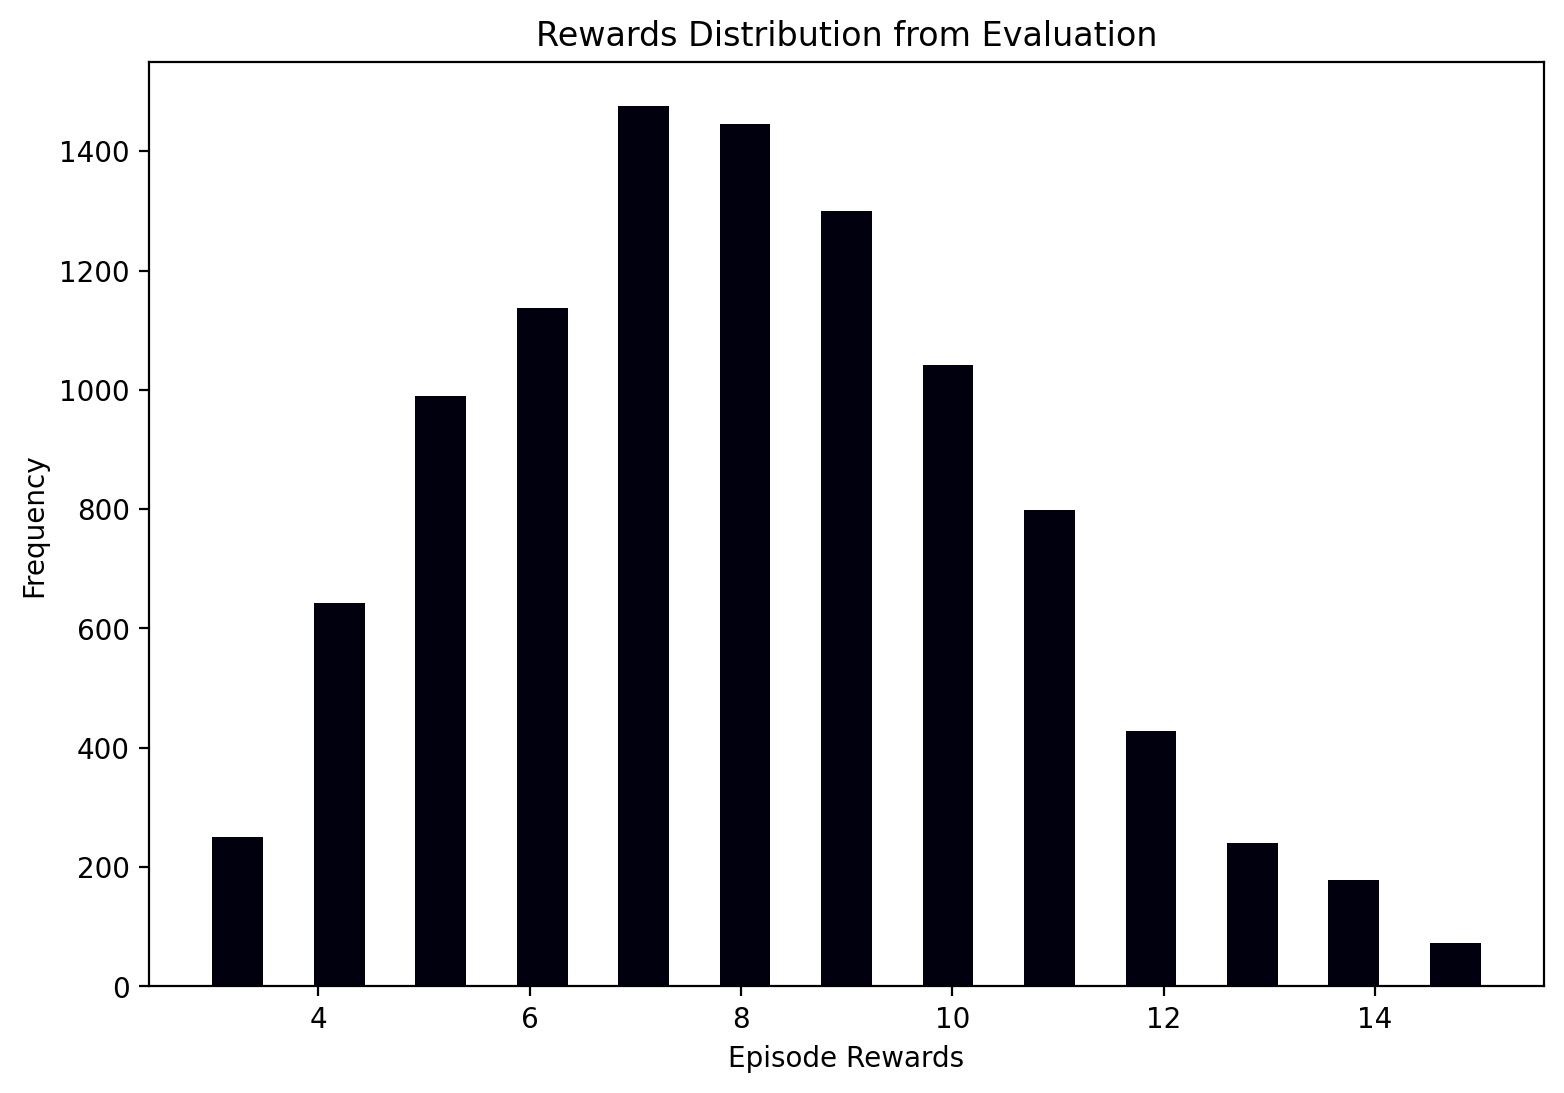

In [13]:
# Set the number of evaluation episodes
n_eval_episodes = 10000

# Evaluate the agent
mean_reward, std_reward, episode_rewards = evaluate_agent(n_max_steps, n_eval_episodes, Qtable)

# Print evaluation results
print(f"Mean Reward: {mean_reward:.2f} +/- {std_reward:.2f}")
print(f"Min Reward: {min(episode_rewards):.1f}, Max Reward: {max(episode_rewards):.1f}")

# Show the distribution of rewards obtained from evaluation
plt.figure(figsize=(9, 6), dpi=200)
plt.title('Rewards Distribution from Evaluation')
plt.hist(episode_rewards, bins=25, color='#00000f')
plt.xlabel('Episode Rewards')
plt.ylabel('Frequency')
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Test the Agent</div>

1. Resets the environment to its initial state.
2. Iterates through 50 steps, rendering and displaying the environment state at each step.
3. Uses a greedy policy to select actions based on the learned Q-table during evaluation.
4. Passes the selected action into the environment's step function to observe the next state and receive the corresponding reward.
5. Resets the environment when the agent reaches a terminal state (done=True), such as falling into a hole or reaching the goal.
6. Closes the environment after the iteration is complete.

In summary, the code visually demonstrates the agent's behavior in the environment using a greedy policy, allowing you to observe its actions and transitions through states.

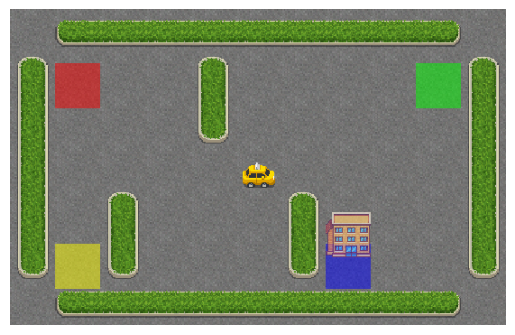

In [14]:
# Reset the environment to its initial state
state, info = env.reset()

# Cycle through 50 steps, rendering and displaying the environment state each time
for _ in range(50):
    # Render and display the current state of the environment
    plt.imshow(env.render())  # Render the current state and pass it to pyplot
    plt.axis('off')
    display.display(plt.gcf())  # Get the current figure and display it
    display.clear_output(wait=True)  # Clear output before showing the next frame

    # Use the greedy policy to evaluate
    action = eval_greedy(Qtable, state)

    # Pass the action into the step function
    state, reward, done, _, info = env.step(action)

    # Reset the environment when done=True, i.e., when the agent falls into a Hole (H) or reaches the Goal (G)
    if done:
        # Render and display the final state of the environment
        plt.imshow(env.render())  # Render the current state and pass it to pyplot
        plt.axis('off')
        display.display(plt.gcf())  # Get the current figure and display it
        display.clear_output(wait=True)  # Clear output before showing the next frame
        state, info = env.reset()

# Close the environment
env.close()